In [2]:
from zipfile import ZipFile as zp
import pandas as pd

dz = zp("/content/cars.zip")
data = pd.read_csv(dz.open("car_price_prediction.csv"), low_memory = False)
data_copy = data.copy()

data.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [3]:
data.shape

(19237, 18)

In [4]:
data.drop(columns = 'ID', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [5]:
data['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

in this case, "-" means NaN value. Thus, we should change it

In [6]:
import numpy as np

data['Levy'] = data['Levy'].replace("-", np.nan)

In [7]:
data.isnull().sum()

,0
Price,0
Levy,5819
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0
Mileage,0


In [8]:
data.isna().sum() / data.shape[0] * 100

,0
Price,0.000000
Levy,30.248999
Manufacturer,0.000000
Model,0.000000
Prod. year,0.000000
Category,0.000000
Leather interior,0.000000
Fuel type,0.000000
Engine volume,0.000000
Mileage,0.000000


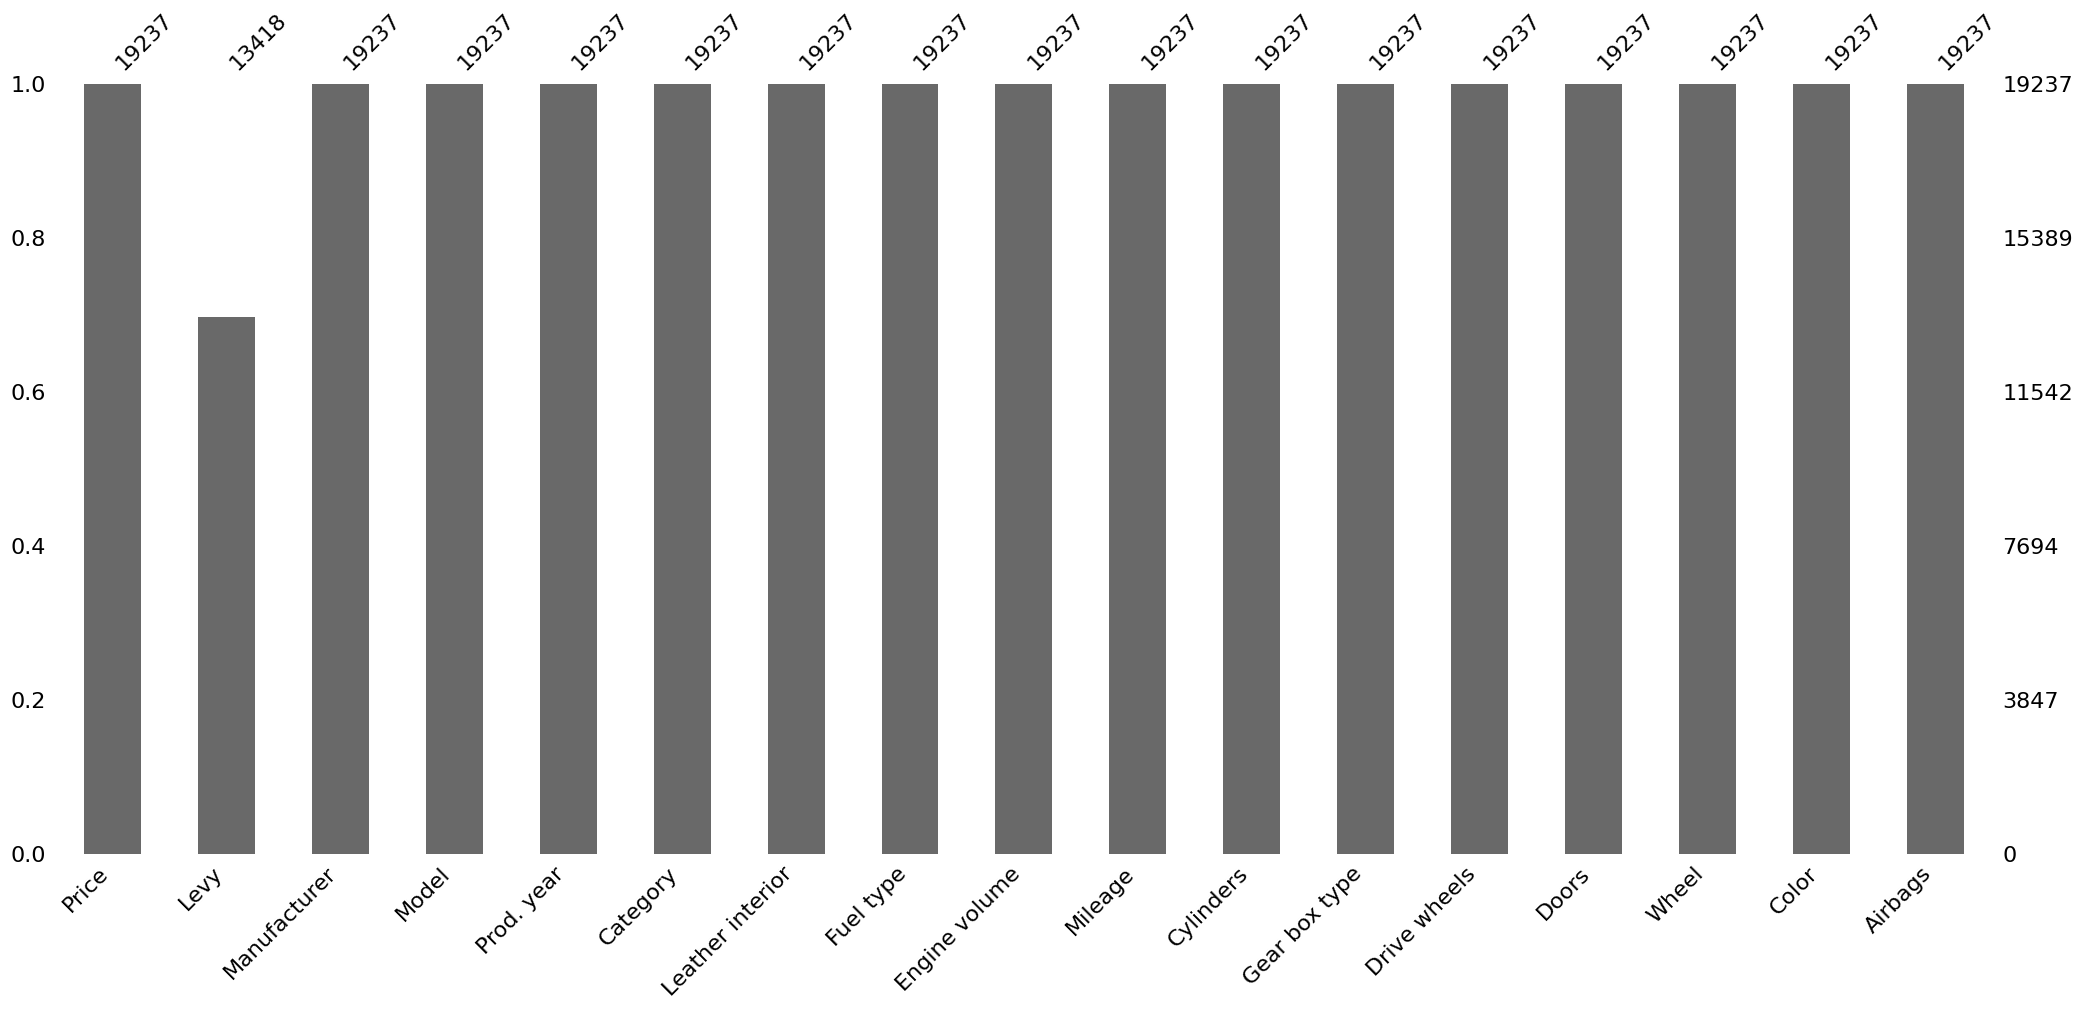

In [9]:
#Visualize null values
import missingno as ms
import matplotlib.pyplot as plt

ms.bar(data)
plt.show()

In [10]:
data['Levy'] = data['Levy'].fillna(0).astype(int)
data['Levy'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19237 entries, 0 to 19236
Series name: Levy
Non-Null Count  Dtype
--------------  -----
19237 non-null  int64
dtypes: int64(1)
memory usage: 150.4 KB


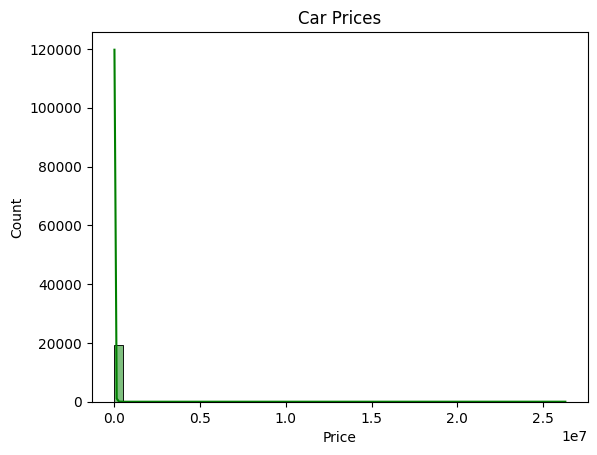

In [12]:
#Distribution for Car Prices
import seaborn as sns

sns.histplot(data['Price'], bins = 50, kde = True, color = 'green')
plt.title('Car Prices')
plt.show()

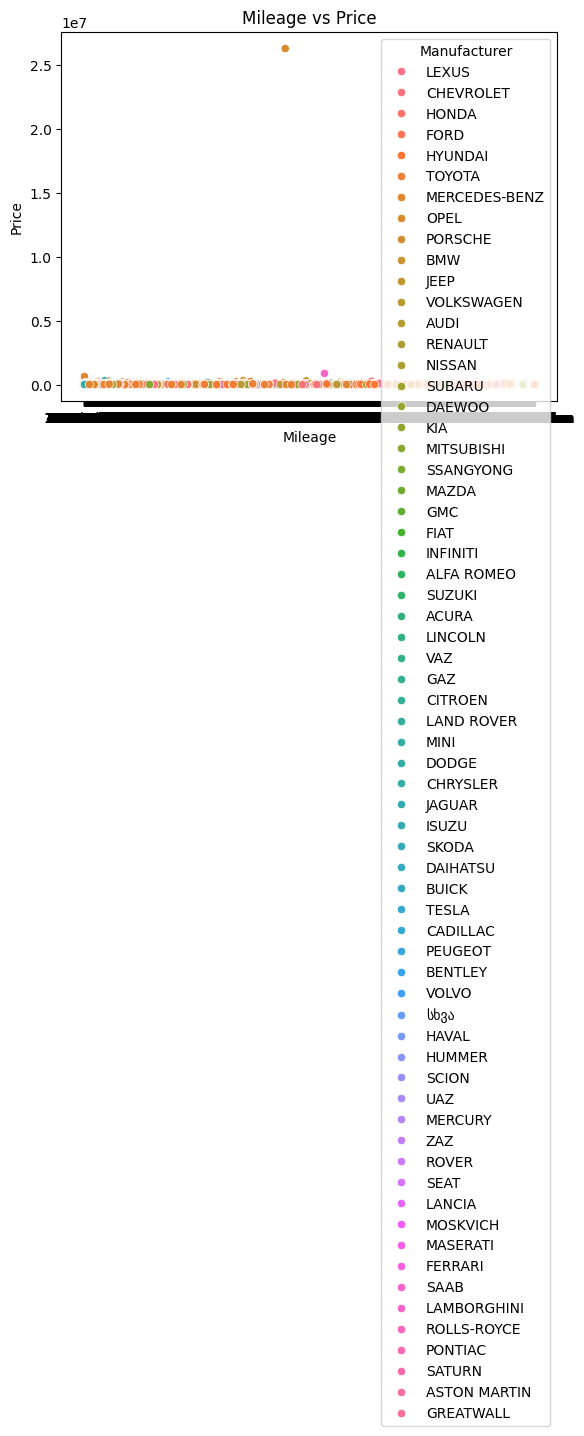

In [13]:
sns.scatterplot(x = data['Mileage'], y = data['Price'], hue = data['Manufacturer'])
plt.title('Mileage vs Price')
plt.show()

In [11]:
#Encoding
from sklearn.preprocessing import LabelEncoder

categorical = list(data.select_dtypes(include = 'object').columns)
le = LabelEncoder()

for column in categorical:
  data[column] = le.fit_transform(data[column])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int64  
 2   Manufacturer      19237 non-null  int64  
 3   Model             19237 non-null  int64  
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  int64  
 6   Leather interior  19237 non-null  int64  
 7   Fuel type         19237 non-null  int64  
 8   Engine volume     19237 non-null  int64  
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  int64  
 12  Drive wheels      19237 non-null  int64  
 13  Doors             19237 non-null  int64  
 14  Wheel             19237 non-null  int64  
 15  Color             19237 non-null  int64  
 16  Airbags           19237 non-null  int64 

In [12]:
#checking outliers using z-score

from scipy.stats import zscore

numeric = data.select_dtypes(include = ['float64', 'int64']).columns
zscore = data[numeric].apply(zscore)
outliers = (zscore > 3) | (zscore < -3)
print(f"Outliers \n {outliers.sum()}")

Outliers 
 Price                  3
Levy                 155
Manufacturer           0
Model                  0
Prod. year           150
Category               0
Leather interior       0
Fuel type              0
Engine volume        186
Mileage                0
Cylinders             57
Gear box type          0
Drive wheels           0
Doors                905
Wheel               1484
Color                  0
Airbags                0
dtype: int64


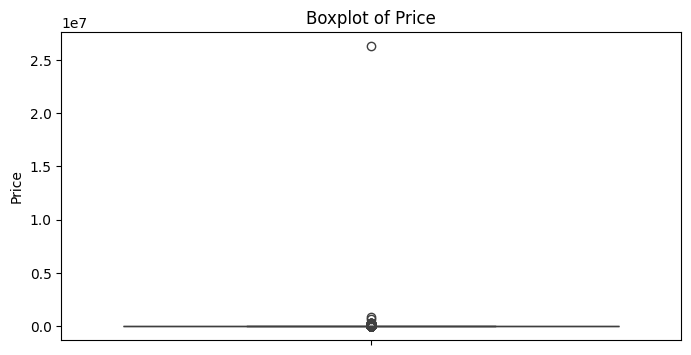

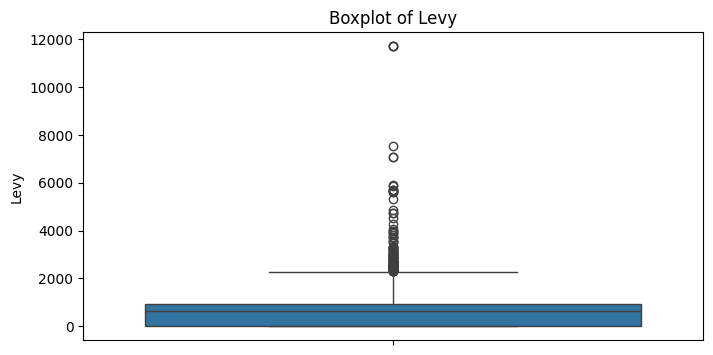

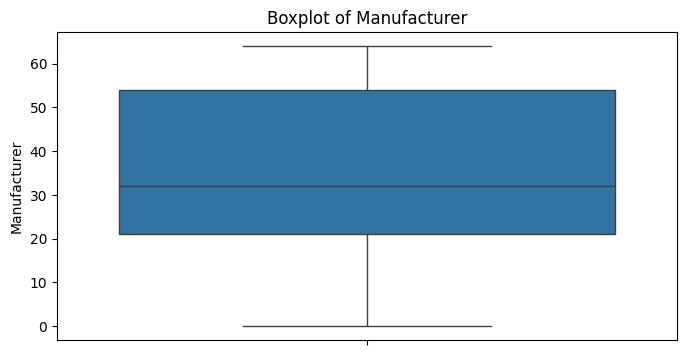

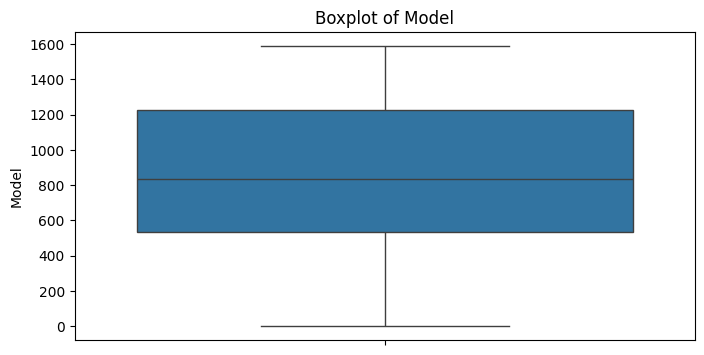

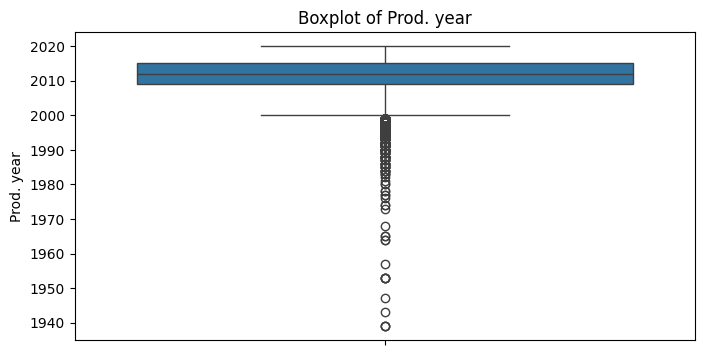

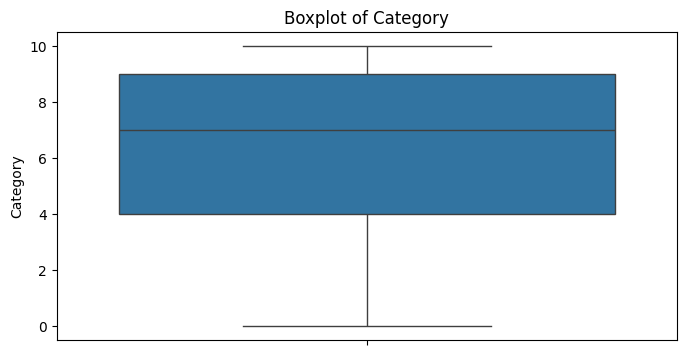

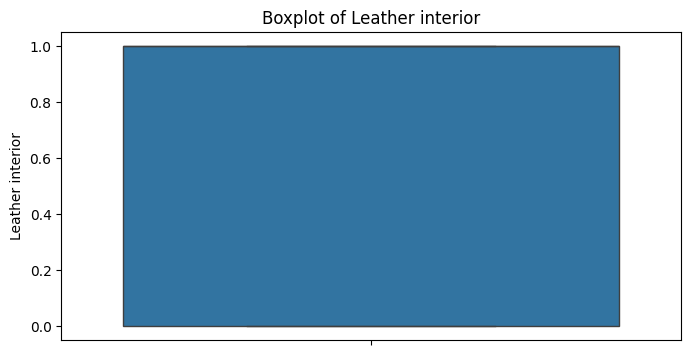

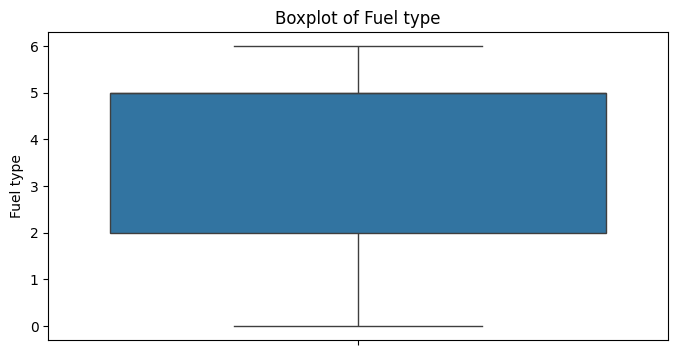

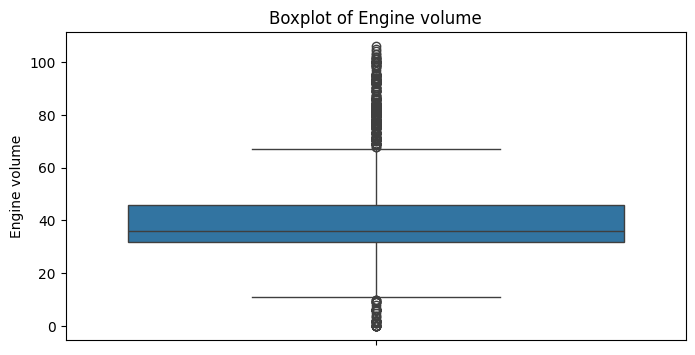

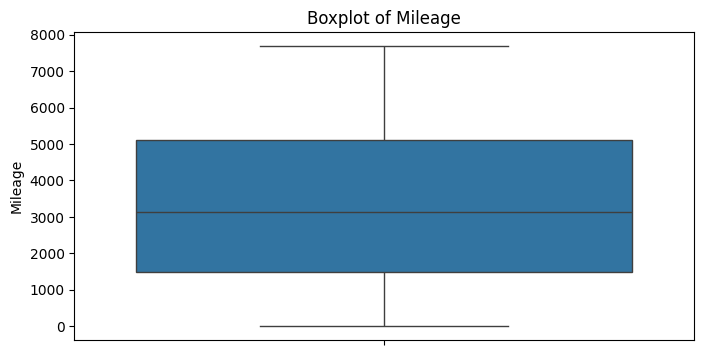

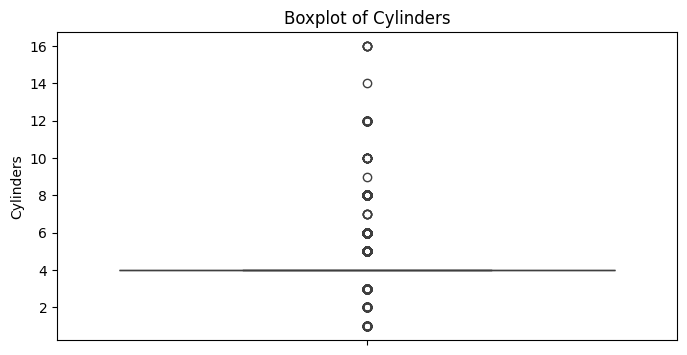

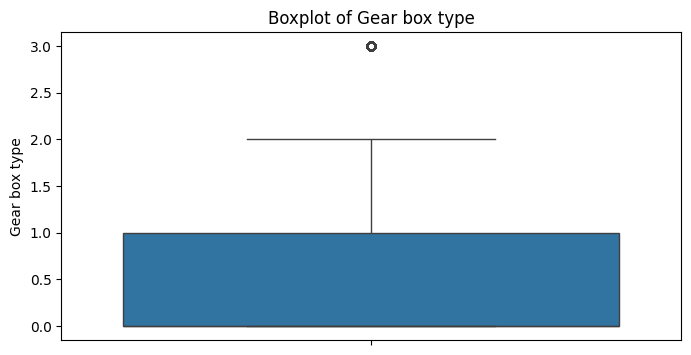

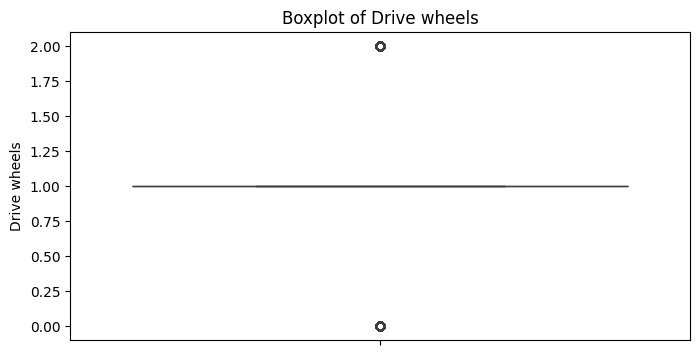

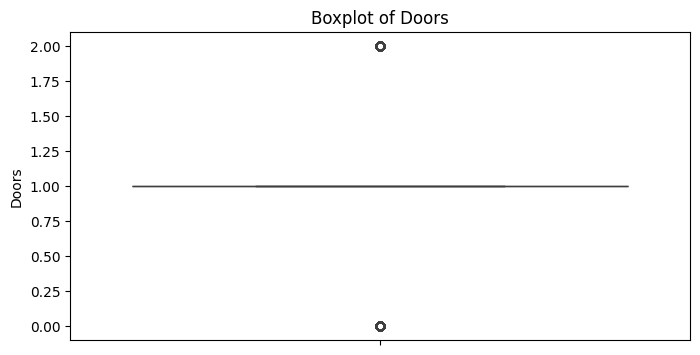

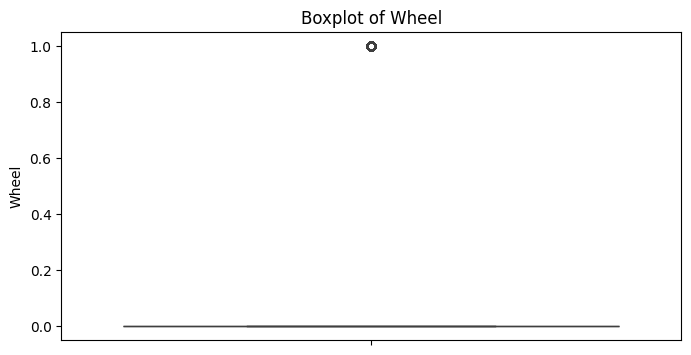

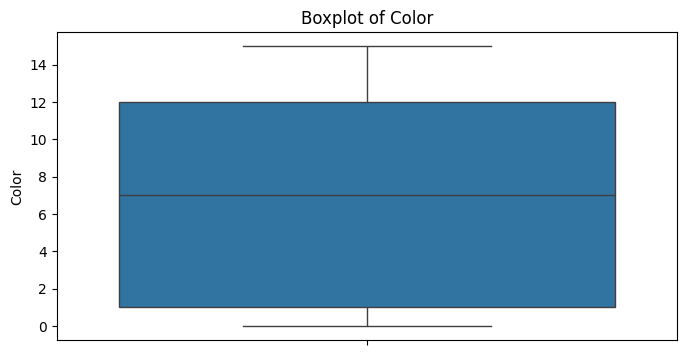

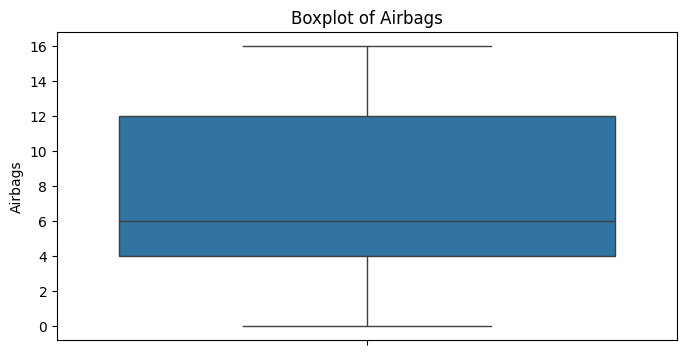

In [16]:
#Boxplots
for i in numeric:
    plt.figure(figsize = (8, 4))
    sns.boxplot(data = data[i])
    plt.title(f"Boxplot of {i}")
    plt.show()

In [13]:
# Remove outliers for numerical features
for col in numeric:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr

    data = data[(data[col] >= low) & (data[col] <= up)]

In [14]:
#Spliting data
from sklearn.model_selection import train_test_split

y = data['Price']
x = data.drop(columns = 'Price', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [15]:
#Standardize
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

In [17]:
#Building model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential(
    [Dense(64, activation = 'relu', input_dim = x_train.shape[1]),
     Dropout(0.3),
     Dense(32, activation = 'linear'),
     Dropout(0.3),
     Dense(1, activation = 'linear')]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


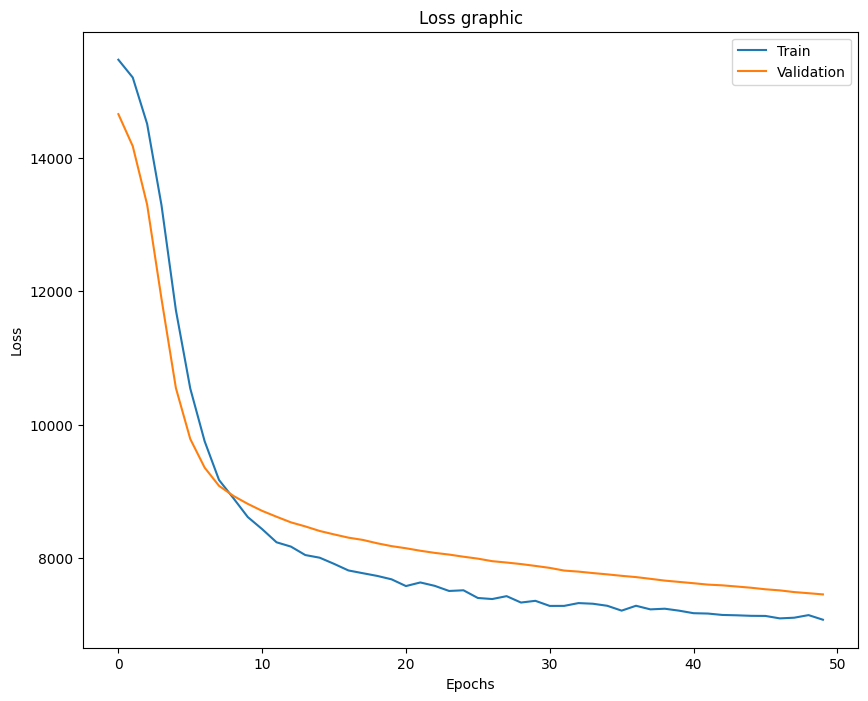

In [18]:
model.compile(optimizer = 'adam', loss = 'mae', metrics = ['mae'])
result = model.fit(x_train, y_train, validation_data = (x_val, y_val), verbose = 0, epochs = 50)

plt.figure(figsize = (10, 8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title("Loss graphic")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


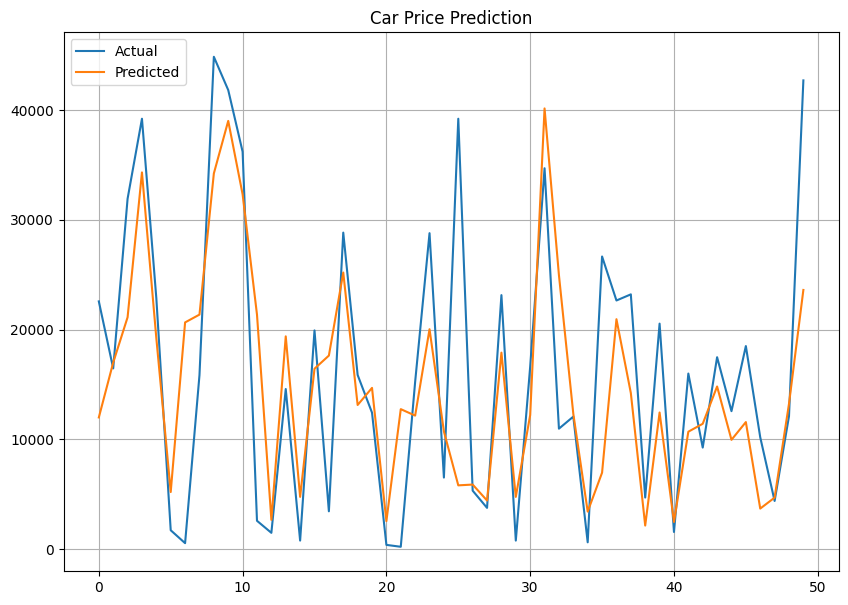

In [19]:
pred = model.predict(x_test)

plt.figure(figsize = (10, 7))
plt.plot(range(len(y_test[ : 50])), y_test[ : 50], label = 'Actual')
plt.plot(range(len(y_test[ : 50])), pred[ : 50], label = 'Predicted')
plt.title("Car Price Prediction")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from scikeras.wrappers import KerasRegressor
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, make_scorer

def regressor(units=64, activation='relu', hidden_layer=2, learning_rate=0.01, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(units=units, input_dim=x_train.shape[1], activation=activation))

    for j in range(hidden_layer):
        model.add(Dense(units=units, activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate), loss='mae', metrics=['mae'])

    return model

params = {
    "units": [32, 64],  # Prefix with 'build_fn__' to pass to the build_fn
    "hidden_layer": [2, 3],
    "dropout_rate": [0.1, 0.2],
    "epochs": [50, 100],
    "learning_rate": [0.001, 0.01],
    "activation": ['relu', 'linear']  # This will be passed to the build_fn
}

regression = KerasRegressor(build_fn=regressor, verbose=0)
r2 = make_scorer(r2_score)

# Perform grid search
grid = GridSearchCV(estimator=regressor_model, param_distributions=params, n_iter=10, cv=3, n_jobs=-1, scoring=r2)
grid_res = grid.fit(x_train, y_train)

bestparam = grid_res.best_params_

In [ ]:
best_model = regressor(units = bestparam['units'],
                        activitation = bestparam['activitation'],
                        hidden_layer = bestparam['hidden_layer'],
                        learning_rate = bestparam['learning_rate'],
                        droput_rate = bestparam['droput_rate'])

result = best_model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = bestparam['epochs'], verbose = 0, batch_size = 64)

#Prediction
pred = best_model.predict(x_test)

#Visualize result
fig, ax = plt.subplot(1, 2, figsize = (20, 15))

ax[0].plot(result.history['loss'], label = 'Training')
ax[0].plot(result.history['val_loss'], label = 'Validation')
ax[0].set_title("Traning & Validation")
ax[0].legend()

ax[1].plot(range(len(y_test[ : 50])), y_test[ : 50], label = 'Actual')
ax[1].plot(range(len(y_test[ : 50])), pred[ : 50], label = 'Predicted')
ax[1].set_title("Car Price Prediction")
ax[1].legend()
plt.show()